<a href="https://colab.research.google.com/github/nehaa28/dl/blob/main/DL_assignment_1_group113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No

## Group Member Names:
1.
2.
3.
4.

# 1. Import the required libraries

In [1]:
!pip install tensorflow opencv-python matplotlib
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [3]:
#load Dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [5]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3])
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], x_train.shape[3])
x_test=x_test / 255.0

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Since the values in our x_train dataset are 32x32 color images, our input shape must be specified so that our model will know what is being inputed.

The first layer expects a single 50000x32x32x3 tensor instead of 50000 32x32x3 tensors.

Models generally run better on normalized values. The best way to normalize the data depends on each individual dataset.

For the CIFAR10 dataset, we want each value to be between 0.0 and 1.0. As all values originally fall under the 0.0-255.0 range, divide by 255.0.

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

9


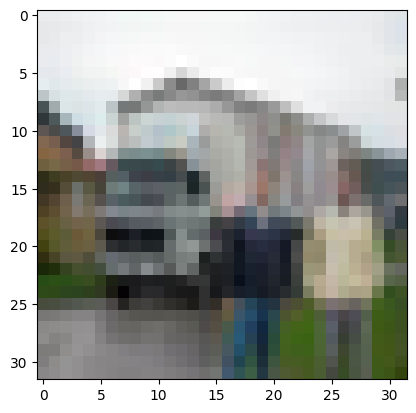

In [10]:
#visualize Data
plt.imshow(x_train[16])
print(y_train[16])

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [11]:
'''Label Encoding The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, 2 (bird) becomes [0,0,1,0,0,0,0,0,0,0] and 7 (horse) becomes [0,0,0,0,0,0,0,1,0,0].
'''
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [12]:
#Model Hyper parameters
batch_size = 30
num_classes = 10
epochs = 5

## 3.3 Split the data into training set and testing set

## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


Label Encoding The labels for the training and the testing dataset are currently categorical and is not continuous. To include categorical dataset in our model, our labels should be converted to one-hot encodings.

For example, 2 (bird) becomes [0,0,1,0,0,0,0,0,0,0] and 7 (horse) becomes [0,0,0,0,0,0,0,1,0,0].


In [13]:
print(x_train.shape)

(50000, 32, 32, 3)


In [14]:
print(y_train.shape)

(50000, 10)


In [15]:
print(x_test.shape)

(10000, 32, 32, 3)


In [16]:
print(y_test.shape)

(10000, 10)


# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [17]:
dnn = tf.keras.models.Sequential()

#number of input neurons will be equal to number of features
dnn.add(tf.keras.layers.InputLayer(input_shape=input_shape,batch_size=batch_size))

#units - number of neurons at hidden layer
#No rule of thumb for number of neurons at hidden layers
dnn.add(tf.keras.layers.Dense(units=32,activation='relu'))

#add second layer of hidden layer
dnn.add(tf.keras.layers.Dense(units=16,activation='relu'))

#add third layer of hidden layer
dnn.add(tf.keras.layers.Dense(units=8,activation='relu'))

#add Output layer
dnn.add(tf.keras.layers.Flatten())
dnn.add(tf.keras.layers.Dense(units=num_classes,activation='softmax'))

In [18]:
print(y_train.shape)

(50000, 10)


## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [19]:
#View all the layers of the network using the Keras Model.summary method

dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (30, 32, 32, 32)          128       
                                                                 
 dense_1 (Dense)             (30, 32, 32, 16)          528       
                                                                 
 dense_2 (Dense)             (30, 32, 32, 8)           136       
                                                                 
 flatten (Flatten)           (30, 8192)                0         
                                                                 
 dense_3 (Dense)             (30, 10)                  81930     
                                                                 
Total params: 82,722
Trainable params: 82,722
Non-trainable params: 0
_________________________________________________________________


# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [20]:
dnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [21]:
#Train the model for 5 epochs with the Keras Model.fit method
#Fit the Training Data
#history = dnn.fit(x_train, y_train, batch_size=batch_size,epochs=epochs)
history = dnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
1667/1667 [==============================] - 40s 23ms/step - loss: 1.6966 - accuracy: 0.4033 - val_loss: 1.5628 - val_accuracy: 0.4496
Epoch 2/5
1667/1667 [==============================] - 39s 24ms/step - loss: 1.5404 - accuracy: 0.4602 - val_loss: 1.5489 - val_accuracy: 0.4594
Epoch 3/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.5016 - accuracy: 0.4724 - val_loss: 1.5184 - val_accuracy: 0.4600
Epoch 4/5
1667/1667 [==============================] - 37s 22ms/step - loss: 1.4762 - accuracy: 0.4824 - val_loss: 1.5222 - val_accuracy: 0.4579
Epoch 5/5
1667/1667 [==============================] - 37s 22ms/step - loss: 1.4570 - accuracy: 0.4946 - val_loss: 1.4992 - val_accuracy: 0.4720


Justify your choice of optimizers and regulizations used and the hyperparameters tuned




1.   Batch Size (batch_size = 30):
The batch size determines the number of samples that are propagated through the network at each training step. A smaller batch size, such as 30, can offer benefits such as a smaller memory footprint and faster convergence. It allows for more frequent weight updates, which can help the model learn faster. However, very small batch sizes might introduce noise in the parameter updates. The choice of batch size depends on the available computational resources, the dataset size, and the complexity of the model.
2.   Number of Classes (num_classes = 10):
The number of classes corresponds to the number of distinct categories or labels in the classification task. In this case, there are 10 classes. The number of classes is determined by the specific problem and dataset. It should reflect the number of unique categories that the model needs to predict. For example, if the task is to classify images into different types of animals, and there are 10 animal categories, then num_classes would be set to 10.
3.   Number of Epochs (epochs = 5):
The number of epochs determines the number of times the entire dataset is passed through the neural network during training. Increasing the number of epochs allows the model to see the data more times and potentially improve its performance. However, setting a high number of epochs can also lead to overfitting if the model starts to memorize the training data. The optimal number of epochs depends on the complexity of the problem, the size of the dataset, and early stopping techniques to prevent overfitting. It is often determined through experimentation and monitoring the validation performance.




# 6. Test the model - 0.5 marks


In [22]:
#Predict Results
test_loss, test_acc = dnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4992 - accuracy: 0.4720


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


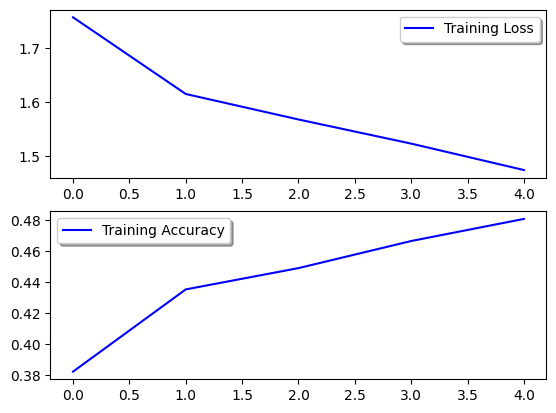

In [89]:
#Model Evaluation : Loss and Accuracy Curves
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


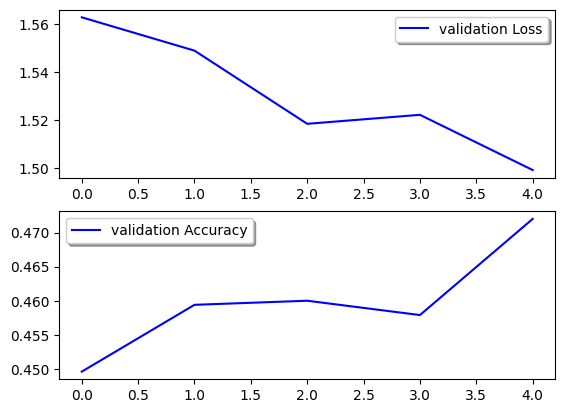

In [25]:
#Model Evaluation : validation Loss and Accuracy Curves
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['val_loss'], color='b', label="validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_accuracy'], color='b', label="validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [26]:
#Predict Results
#Report the testing accuracy and loss.
test_loss, test_acc = dnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4992 - accuracy: 0.4720


In [27]:
#Confusion Matrix
# Predict the values from the validation dataset
y_pred = dnn.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred,axis = 1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 3s 8ms/step


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1000
           1       0.57      0.59      0.58      1000
           2       0.39      0.30      0.34      1000
           3       0.31      0.44      0.36      1000
           4       0.49      0.22      0.30      1000
           5       0.41      0.38      0.39      1000
           6       0.46      0.58      0.51      1000
           7       0.48      0.57      0.52      1000
           8       0.57      0.63      0.60      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#The average='weighted' parameter calculates the weighted average of precision, recall, and F1-score, taking into account class imbalances in the dataset. You can choose other averaging strategies as per your requirement, such as 'macro' or 'micro'

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

In [37]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.472
Precision: 0.47869926354790815
Recall: 0.472
F1-score: 0.4666276054709267


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

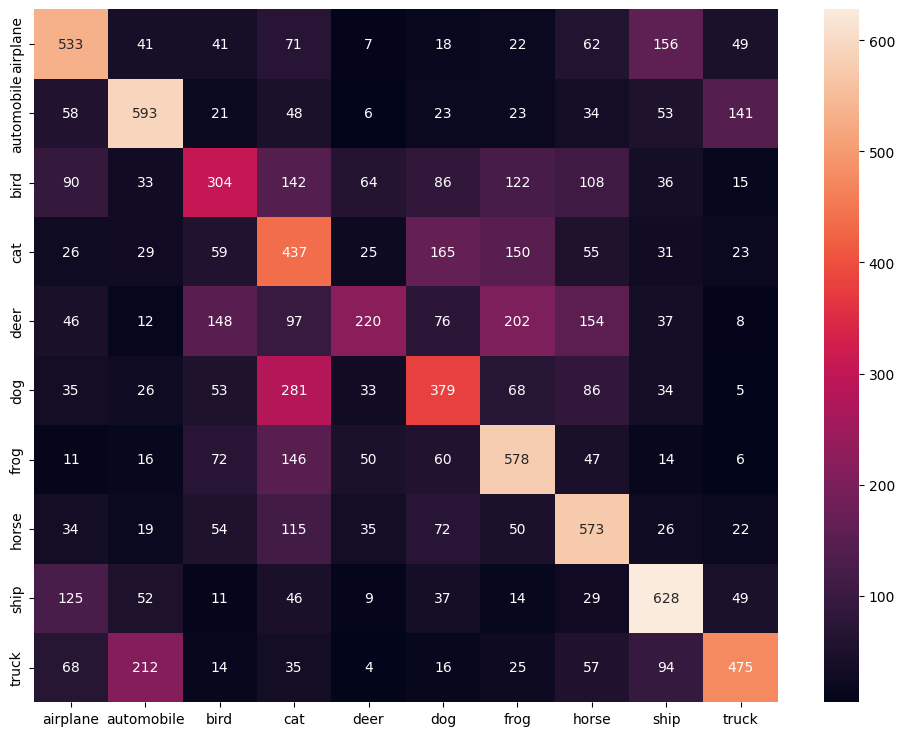

In [38]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [39]:
#by decreasing one layer
dnn_1 = tf.keras.models.Sequential()

#number of input neurons will be equal to number of features
dnn_1.add(tf.keras.layers.InputLayer(input_shape=input_shape,batch_size=batch_size))

#units - number of neurons at hidden layer
#No rule of thumb for number of neurons at hidden layers
dnn_1.add(tf.keras.layers.Dense(units=32,activation='relu'))

#add second layer of hidden layer
dnn_1.add(tf.keras.layers.Dense(units=16,activation='relu'))

#add Output layer
dnn_1.add(tf.keras.layers.Flatten())
dnn_1.add(tf.keras.layers.Dense(units=num_classes,activation='softmax'))

dnn_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Fit the Training Data
history_1 = dnn_1.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/5
1667/1667 [==============================] - 59s 32ms/step - loss: 1.6359 - accuracy: 0.4233 - val_loss: 1.5090 - val_accuracy: 0.4650
Epoch 2/5
1667/1667 [==============================] - 34s 20ms/step - loss: 1.4820 - accuracy: 0.4856 - val_loss: 1.4713 - val_accuracy: 0.4813
Epoch 3/5
1667/1667 [==============================] - 36s 21ms/step - loss: 1.4316 - accuracy: 0.5033 - val_loss: 1.4640 - val_accuracy: 0.4823
Epoch 4/5
1667/1667 [==============================] - 50s 30ms/step - loss: 1.3991 - accuracy: 0.5163 - val_loss: 1.4806 - val_accuracy: 0.4789
Epoch 5/5
1667/1667 [==============================] - 51s 31ms/step - loss: 1.3717 - accuracy: 0.5245 - val_loss: 1.4988 - val_accuracy: 0.4741


In [40]:
#by increasing one layer
dnn_2 = tf.keras.models.Sequential()

#number of input neurons will be equal to number of features
dnn_2.add(tf.keras.layers.InputLayer(input_shape=input_shape,batch_size=batch_size))

#units - number of neurons at hidden layer
#No rule of thumb for number of neurons at hidden layers
dnn_2.add(tf.keras.layers.Dense(units=32,activation='relu'))

#add second layer of hidden layer
dnn_2.add(tf.keras.layers.Dense(units=16,activation='relu'))

#add third layer of hidden layer
dnn_2.add(tf.keras.layers.Dense(units=16,activation='relu'))

#add fourth layer of hidden layer
dnn_2.add(tf.keras.layers.Dense(units=16,activation='relu'))

#add Output layer
dnn_2.add(tf.keras.layers.Flatten())
dnn_2.add(tf.keras.layers.Dense(units=num_classes,activation='softmax'))

dnn_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Fit the Training Data
history_2= dnn_2.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/5
1667/1667 [==============================] - 52s 30ms/step - loss: 1.6293 - accuracy: 0.4235 - val_loss: 1.4959 - val_accuracy: 0.4705
Epoch 2/5
1667/1667 [==============================] - 48s 29ms/step - loss: 1.4779 - accuracy: 0.4858 - val_loss: 1.4908 - val_accuracy: 0.4732
Epoch 3/5
1667/1667 [==============================] - 49s 30ms/step - loss: 1.4232 - accuracy: 0.5038 - val_loss: 1.4558 - val_accuracy: 0.4821
Epoch 4/5
1667/1667 [==============================] - 48s 29ms/step - loss: 1.3863 - accuracy: 0.5196 - val_loss: 1.4412 - val_accuracy: 0.4927
Epoch 5/5
1667/1667 [==============================] - 45s 27ms/step - loss: 1.3521 - accuracy: 0.5304 - val_loss: 1.4696 - val_accuracy: 0.4820


# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [41]:
#by increasing one layer
dnn_dropout = tf.keras.models.Sequential()

#number of input neurons will be equal to number of features
dnn_dropout.add(tf.keras.layers.InputLayer(input_shape=input_shape,batch_size=batch_size))

#units - number of neurons at hidden layer
#No rule of thumb for number of neurons at hidden layers
dnn_dropout.add(tf.keras.layers.Dense(units=32,activation='relu'))
dnn_dropout.add(tf.keras.layers.Dropout(0.25))

#add second layer of hidden layer
dnn_dropout.add(tf.keras.layers.Dense(units=16,activation='relu'))
dnn_dropout.add(tf.keras.layers.Dropout(0.25))

#add third layer of hidden layer
dnn_dropout.add(tf.keras.layers.Dense(units=16,activation='relu'))
dnn_dropout.add(tf.keras.layers.Dropout(0.25))

#add Output layer
dnn_dropout.add(tf.keras.layers.Flatten())
dnn_dropout.add(tf.keras.layers.Dense(units=num_classes,activation='softmax'))

dnn_dropout.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Fit the Training Data
history_dropout= dnn_dropout.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/5
1667/1667 [==============================] - 95s 56ms/step - loss: 1.7008 - accuracy: 0.4016 - val_loss: 1.5268 - val_accuracy: 0.4599
Epoch 2/5
1667/1667 [==============================] - 125s 75ms/step - loss: 1.5310 - accuracy: 0.4612 - val_loss: 1.5084 - val_accuracy: 0.4631
Epoch 3/5
1667/1667 [==============================] - 123s 74ms/step - loss: 1.4828 - accuracy: 0.4768 - val_loss: 1.4939 - val_accuracy: 0.4669
Epoch 4/5
1667/1667 [==============================] - 93s 56ms/step - loss: 1.4576 - accuracy: 0.4882 - val_loss: 1.4687 - val_accuracy: 0.4782
Epoch 5/5
1667/1667 [==============================] - 92s 55ms/step - loss: 1.4404 - accuracy: 0.4947 - val_loss: 1.4783 - val_accuracy: 0.4784


In [42]:
dnn_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (30, 32, 32, 32)          128       
                                                                 
 dropout (Dropout)           (30, 32, 32, 32)          0         
                                                                 
 dense_13 (Dense)            (30, 32, 32, 16)          528       
                                                                 
 dropout_1 (Dropout)         (30, 32, 32, 16)          0         
                                                                 
 dense_14 (Dense)            (30, 32, 32, 16)          272       
                                                                 
 dropout_2 (Dropout)         (30, 32, 32, 16)          0         
                                                                 
 flatten_3 (Flatten)         (30, 16384)              

In [43]:
#Performing L2 regulariser with factor 1e−04
#The l2() function returns a regularizer that will be called to compute the regularization loss, at each step during training.
#This regularization loss is then added to the final loss.

# Define the L2 regularization factor
l2_factor = 1e-04

# Create the DNN model
dnn_l2 = tf.keras.models.Sequential()

# Number of input neurons will be equal to the number of features
dnn_l2.add(tf.keras.layers.InputLayer(input_shape=input_shape, batch_size=batch_size))

# Add the first layer with L2 regularization
dnn_l2.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_factor)))

# Add the second layer with L2 regularization
dnn_l2.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_factor)))

# Add the third layer with L2 regularization
dnn_l2.add(tf.keras.layers.Dense(units=8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_factor)))

# Add the output layer
dnn_l2.add(tf.keras.layers.Flatten())
dnn_l2.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

# Compile the model and define the loss function, optimizer, and metrics
dnn_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the Training Data
history_l2= dnn_l2.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))



Epoch 1/5
1667/1667 [==============================] - 37s 22ms/step - loss: 1.6720 - accuracy: 0.4109 - val_loss: 1.5355 - val_accuracy: 0.4581
Epoch 2/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.5175 - accuracy: 0.4694 - val_loss: 1.4902 - val_accuracy: 0.4747
Epoch 3/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.4763 - accuracy: 0.4837 - val_loss: 1.4947 - val_accuracy: 0.4708
Epoch 4/5
1667/1667 [==============================] - 37s 22ms/step - loss: 1.4495 - accuracy: 0.4964 - val_loss: 1.4980 - val_accuracy: 0.4773
Epoch 5/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.4299 - accuracy: 0.5022 - val_loss: 1.4895 - val_accuracy: 0.4729


# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [45]:
LOSS_FUNCTION = "categorical_crossentropy"
OPTIMIZER = "RMSprop"
METRICS = ["accuracy"]

dnn.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

epochs=5
history_RMSprop= dnn.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/5
1667/1667 [==============================] - 59s 35ms/step - loss: 1.4438 - accuracy: 0.4980 - val_loss: 1.4988 - val_accuracy: 0.4708
Epoch 2/5
1667/1667 [==============================] - 34s 20ms/step - loss: 1.4337 - accuracy: 0.5023 - val_loss: 1.5107 - val_accuracy: 0.4672
Epoch 3/5
1667/1667 [==============================] - 34s 21ms/step - loss: 1.4243 - accuracy: 0.5077 - val_loss: 1.5106 - val_accuracy: 0.4681
Epoch 4/5
1667/1667 [==============================] - 34s 20ms/step - loss: 1.4163 - accuracy: 0.5114 - val_loss: 1.5144 - val_accuracy: 0.4671
Epoch 5/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.4078 - accuracy: 0.5143 - val_loss: 1.4998 - val_accuracy: 0.4775


In [46]:
test_loss, test_acc = dnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4998 - accuracy: 0.4775


In [47]:
LOSS_FUNCTION = "categorical_crossentropy"
OPTIMIZER = "Adam"
METRICS = ["accuracy"]

dnn.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

epochs=5
history_Adam = dnn.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,validation_data=(x_test, y_test))



Epoch 1/5
1667/1667 [==============================] - 37s 21ms/step - loss: 1.3971 - accuracy: 0.5180 - val_loss: 1.5228 - val_accuracy: 0.4651
Epoch 2/5
1667/1667 [==============================] - 36s 22ms/step - loss: 1.3865 - accuracy: 0.5203 - val_loss: 1.5220 - val_accuracy: 0.4671
Epoch 3/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.3751 - accuracy: 0.5248 - val_loss: 1.5248 - val_accuracy: 0.4726
Epoch 4/5
1667/1667 [==============================] - 34s 20ms/step - loss: 1.3668 - accuracy: 0.5269 - val_loss: 1.5171 - val_accuracy: 0.4686
Epoch 5/5
1667/1667 [==============================] - 35s 21ms/step - loss: 1.3586 - accuracy: 0.5307 - val_loss: 1.5314 - val_accuracy: 0.4610


In [48]:
test_loss, test_acc = dnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5314 - accuracy: 0.4610


Plot the comparison of the training and validation accuracy of 10.1

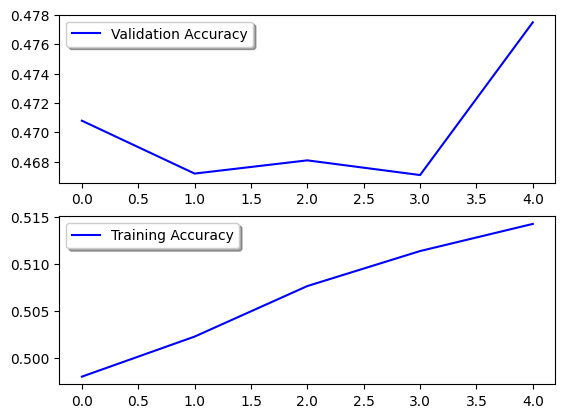

In [49]:
#Model Evaluation : Loss and Accuracy Curves
fig, ax = plt.subplots(2,1)

ax[0].plot(history_RMSprop.history['val_accuracy'], color='b', label="Validation Accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_RMSprop.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Plot the comparison of the training and validation accuracy of 10.2

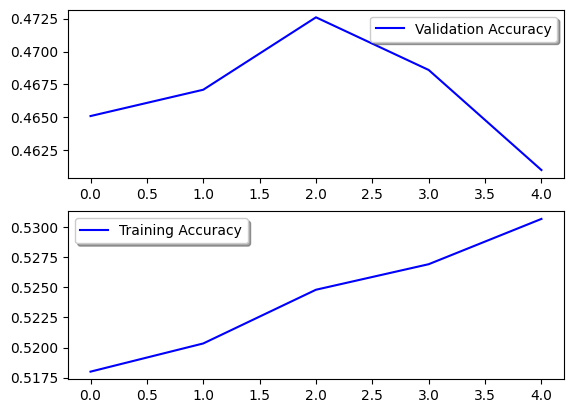

In [50]:
#Model Evaluation : Loss and Accuracy Curves
fig, ax = plt.subplots(2,1)

ax[0].plot(history_Adam.history['val_accuracy'], color='b', label="Validation Accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_Adam.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Plot the comparison of the training and validation accuracy of 5.2

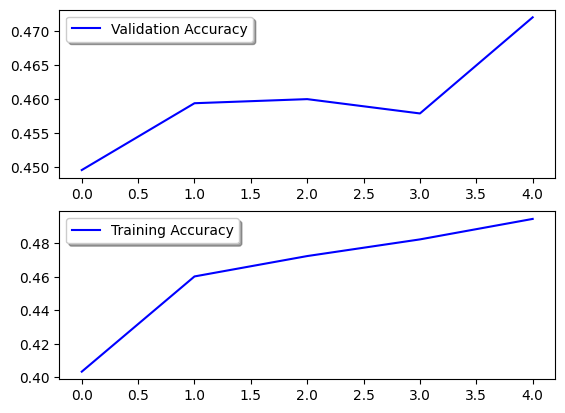

In [51]:
#Model Evaluation : Loss and Accuracy Curves
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['val_accuracy'], color='b', label="Validation Accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [53]:
#Report the testing accuracy and loss.
#Section 4 and 5
#test_loss, test_acc = 1.4992, 0.4720

#Section 8
test_loss, test_acc = dnn_1.evaluate(x_test, y_test)
test_loss, test_acc = dnn_2.evaluate(x_test, y_test)

#Section 9
test_loss, test_acc = dnn_dropout.evaluate(x_test, y_test)
test_loss, test_acc = dnn_l2.evaluate(x_test, y_test)

#Section 10
#test_loss, test_acc = 1.4998, 0.4775#RMSProp
#test_loss, test_acc = 1.5314, 0.4610#ADAM


313/313 [==============================] - 2s 8ms/step - loss: 1.4895 - accuracy: 0.4729


Conclusion:

1.   For our model in Section 4 and 5, test_loss, test_acc = 1.4992, 0.4720
2.   For our model in Section 8, test accuracy for increasing model by one layer increases the value
3.   For our model in Section 9, test accuracy results are better for l2 regularization vs dropout method
4.   For our model in Section 10, test accuracy for RMSProp show better result than ADAM.dropou

Using the above results, it is advisable to
*   increase number of layers,
*   use l2 regularization
*   use RMSProp as optimizer.





### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck